<a href="https://colab.research.google.com/github/Dharma-Ranganathan/Real_Time_Kmeans_Algo/blob/main/KMeans_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# K-Means From Scratch (NumPy Only)

import numpy as np
import matplotlib.pyplot as plt

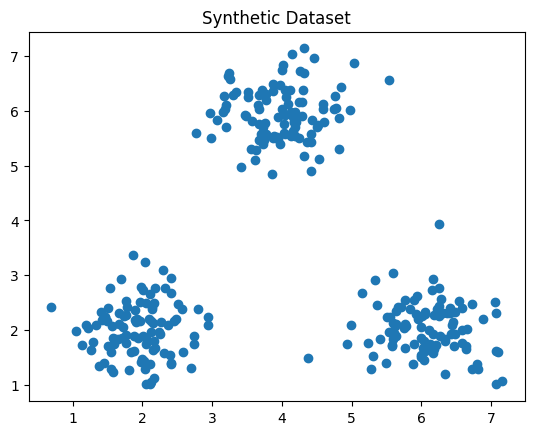

In [2]:
# Generate Synthetic Dataset
np.random.seed(42)
n_samples = 300

class1 = np.random.normal(loc=[2,2], scale=0.5, size=(100,2))
class2 = np.random.normal(loc=[6,2], scale=0.5, size=(100,2))
class3 = np.random.normal(loc=[4,6], scale=0.5, size=(100,2))

X = np.vstack((class1, class2, class3))
y_true = np.array([0]*100 + [1]*100 + [2]*100)

plt.scatter(X[:,0], X[:,1])
plt.title("Synthetic Dataset")
plt.show()


In [3]:
# K-Means Implementation From Scratch

class KMeansScratch:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        np.random.seed(1)
        random_idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:,None] - self.centroids[None,:], axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([X[labels==i].mean(axis=0) if np.any(labels==i) else self.centroids[i]
                                      for i in range(self.k)])

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels = labels
        return labels

    def compute_wcss(self, X):
        distances = np.linalg.norm(X - self.centroids[self.labels], axis=1)
        return np.sum(distances**2)


In [4]:
# Compute WCSS for K = 2 to 7

wcss_values = {}

for k in range(2,8):
    model = KMeansScratch(k)
    model.fit(X)
    wcss = model.compute_wcss(X)
    wcss_values[k] = wcss
    print(f"K = {k} → WCSS = {wcss}")


K = 2 → WCSS = 1115.670992094866
K = 3 → WCSS = 140.29394996810964
K = 4 → WCSS = 123.16549679219548
K = 5 → WCSS = 113.28512025636914
K = 6 → WCSS = 109.97927714764558
K = 7 → WCSS = 105.24022392040396


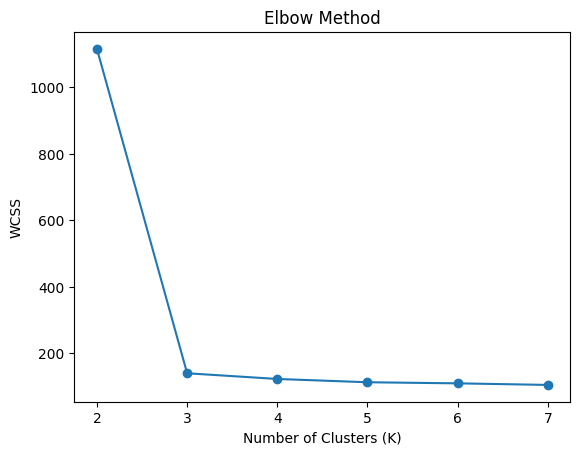

In [5]:
# Elbow Method Plot

plt.plot(list(wcss_values.keys()), list(wcss_values.values()), marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


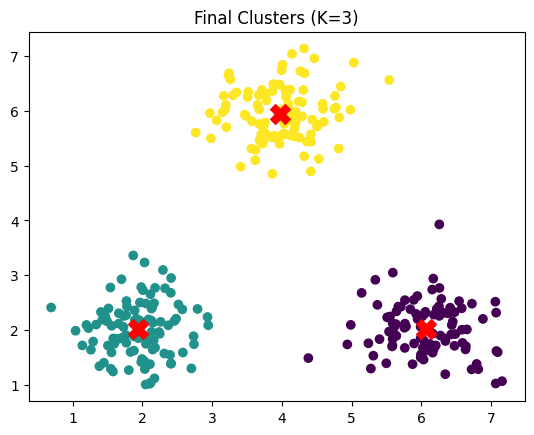

In [6]:
# Fit Optimal K=3 and Plot Clusters

model = KMeansScratch(3)
labels = model.fit(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', s=200, marker='X')
plt.title("Final Clusters (K=3)")
plt.show()
